## Simulation for biallelic dynamics of SCN1A

In [14]:
    # This only needs to be executed when running off of google drive

# from google.colab import drive
# drive.mount('/content/drive')

!pip install --upgrade git+https://github.com/roschkoenig/SodMod.git


  Cloning https://github.com/roschkoenig/SodMod.git to /tmp/pip-req-build-8preai4p
  Running command git clone -q https://github.com/roschkoenig/SodMod.git /tmp/pip-req-build-8preai4p
  Stored in directory: /tmp/pip-ephem-wheel-cache-fsldf7s5/wheels/07/ed/a1/0bc1410b394766c57f600844bcb0d8e79e024d8e5633a74295
Successfully built sodmod
  Found existing installation: sodmod 0.1
    Uninstalling sodmod-0.1:
      Successfully uninstalled sodmod-0.1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from scipy.integrate import odeint

import sodmod as sm
from sodmod import params as pr
from sodmod import cells as cl

In [2]:
# adapted from https://gist.github.com/...
#    giuseppebonaccorso/60ce3eb3a829b94abf64ab2b7a56aaef

# Solve ODE system
#---------------------------------------------------------------------------
np.random.seed(1000)
Y0 = [-40,1.,0.,0.]
T  = np.linspace(0,100,10000)
p  = pr.params('TI37')
Vy = odeint(cl.IN, Y0, T, args=(p,))


/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:14: RuntimeWarning: invalid value encountered in double_scalars
  alpha_m  = (-0.32*(Vm-Vt-13.0)) / (np.exp(-(Vm-Vt-13.0)/4)-1)
/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:15: RuntimeWarning: invalid value encountered in double_scalars
  beta_m   = (0.28*(Vm-Vt-40.0)) / (np.exp((Vm-Vt-40.0)/5)-1)


/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:14: RuntimeWarning: invalid value encountered in double_scalars
  alpha_m  = (-0.32*(Vm-Vt-13.0)) / (np.exp(-(Vm-Vt-13.0)/4)-1)
/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:15: RuntimeWarning: invalid value encountered in double_scalars
  beta_m   = (0.28*(Vm-Vt-40.0)) / (np.exp((Vm-Vt-40.0)/5)-1)


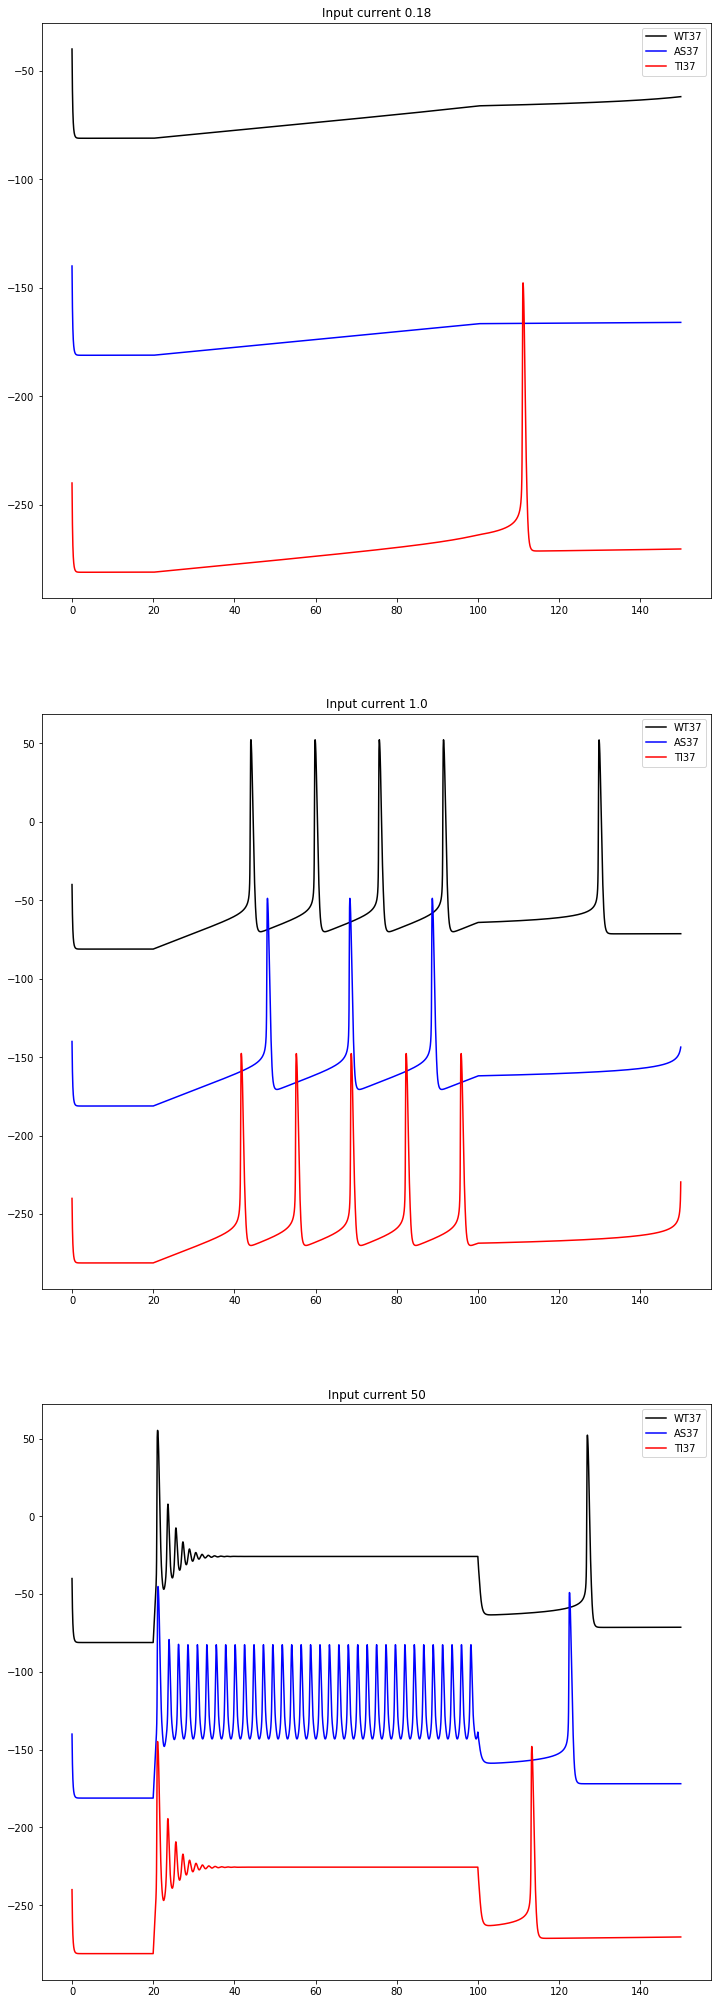

In [3]:
# Solve ODE system
#--------------------------------------------------------------------
reload(pr)
reload(cl)
reload(sm.incurr)

np.random.seed(1000)
Y0 = [-40,1.,0.,0.]
T  = np.linspace(0,150,10000)

conds = ['WT37', 'AS37', 'TI37']
cols  = ['k', 'b', 'r']
I_scl = [.18, 1., 50]

fig, ax = plt.subplots(len(I_scl),1, figsize=(12, len(I_scl)*12))

for i in range(len(I_scl)):
    for ci in range(len(conds)):
        Vy      = odeint(cl.IN, Y0, T, 
                         args=(pr.params(conds[ci], I_scale = I_scl[i]),))
        ax[i].plot(T, Vy[:,0]-ci*100, cols[ci], label = conds[ci]) 
        ax[i].set_title("Input current " + str(I_scl[i]))

for a in range(len(ax)):
    ax[a].legend()